Epoch 1/10


/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.7612 - loss: 0.6804 - val_accuracy: 0.8442 - val_loss: 0.4343
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8538 - loss: 0.4048 - val_accuracy: 0.8598 - val_loss: 0.3811
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8667 - loss: 0.3634 - val_accuracy: 0.8630 - val_loss: 0.3778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8731 - loss: 0.3456 - val_accuracy: 0.8708 - val_loss: 0.3646
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8775 - loss: 0.3294 - val_accuracy: 0.8679 - val_loss: 0.3646
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.8848 - loss: 0.3110 - val_accuracy: 0.8739 - val_loss: 0.3505
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8853 - loss: 0.3071 - val_accuracy: 0.8683 - val_loss: 0.3625
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8921 - loss: 0.29

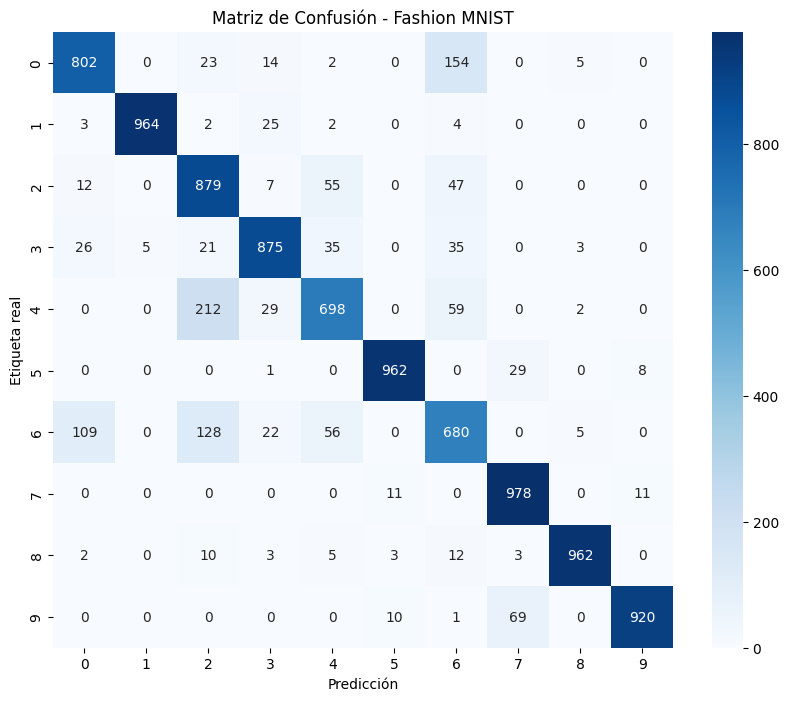


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.69      0.88      0.77      1000
           3       0.90      0.88      0.89      1000
           4       0.82      0.70      0.75      1000
           5       0.98      0.96      0.97      1000
           6       0.69      0.68      0.68      1000
           7       0.91      0.98      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.metrics import confusion_matrix, classification_report

# Cargar el dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los valores de los píxeles (de 0-255 a 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir la imagen en un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Medir el tiempo de entrenamiento
start = time.time()

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"Tiempo de entrenamiento: {finish-start:.2f} segundos")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# Obtener predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Fashion MNIST")
plt.show()

# Mostrar reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes))


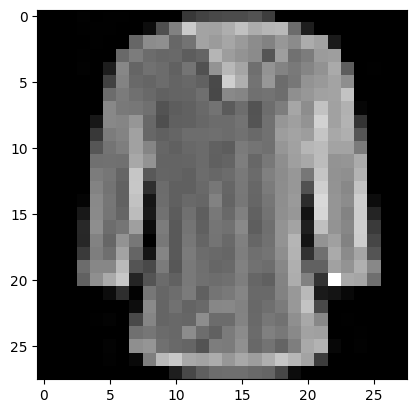

In [2]:
plt.imshow(x_test[4], cmap="gray")
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


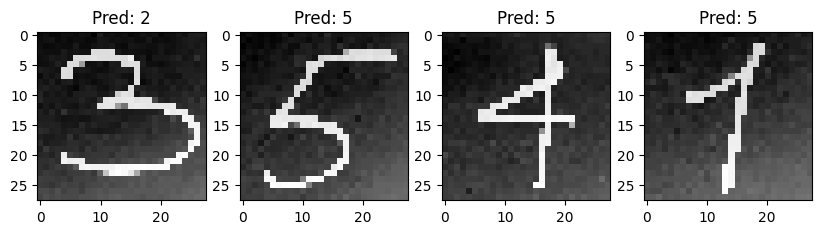

[[0.21568628 0.24313726 0.22352941 0.20784314 0.21960784 0.20784314
  0.22745098 0.26666668 0.20784314 0.2627451  0.26666668 0.24705882
  0.27450982 0.23529412 0.31764707 0.25882354 0.25490198 0.2627451
  0.26666668 0.26666668 0.25490198 0.2627451  0.27058825 0.2509804
  0.26666668 0.28235295 0.29411766 0.29803923]
 [0.23137255 0.20392157 0.22352941 0.21568628 0.23137255 0.21176471
  0.21960784 0.24705882 0.26666668 0.25882354 0.2509804  0.23137255
  0.2627451  0.25882354 0.28235295 0.25490198 0.22352941 0.27058825
  0.28627452 0.25882354 0.25490198 0.24313726 0.2784314  0.26666668
  0.2784314  0.29411766 0.3019608  0.30588236]
 [0.19607843 0.22745098 0.21960784 0.21176471 0.24313726 0.21960784
  0.24705882 0.27058825 0.23137255 0.22745098 0.28235295 0.2901961
  0.2509804  0.2901961  0.2901961  0.25490198 0.3254902  0.2784314
  0.24705882 0.25882354 0.24313726 0.30980393 0.26666668 0.29411766
  0.28627452 0.31764707 0.33333334 0.32941177]
 [0.22352941 0.24705882 0.22745098 0.25490198 0

In [52]:
# Ruta donde están las imágenes procesadas
carpeta_imagenes = "imagenes_procesadas"

# Obtener todas las imágenes .npy en la carpeta
archivos = [f for f in os.listdir(carpeta_imagenes) if f.endswith(".npy")]

# Lista para almacenar imágenes cargadas
imagenes = []

# Cargar todas las imágenes y asegurarse de que tengan la forma correcta
for archivo in archivos:
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)
    imagen = np.load(ruta_imagen)
    
    # Ajustar la forma de cada imagen
    if len(imagen.shape) == 4:  
        imagen = np.squeeze(imagen, axis=-1)  # Quitar canal extra
    if len(imagen.shape) == 3:
        imagen = np.squeeze(imagen, axis=0)  # Quitar batch extra
    
    # Agregar dimensión de batch para cada imagen
    imagen = np.expand_dims(imagen, axis=0)  # Ahora tiene (1,28,28)
    
    # Agregar imagen a la lista
    imagenes.append(imagen)

# Convertir lista a un array numpy (forma final: (n,28,28))
imagenes = np.vstack(imagenes)

# Hacer predicciones para todas las imágenes
predicciones = np.argmax(model.predict(imagenes), axis=1)

# Mostrar las imágenes con sus predicciones
fig, axes = plt.subplots(1, len(imagenes), figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(imagenes[i], cmap="gray")
    ax.set_title(f"Pred: {predicciones[i]}")

plt.show()

print(imagenes[1])

